In [2]:
import sklearn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import datetime

In [3]:
automobile_df = pd.read_csv('datasets/regression/auto-mpg.csv')
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
366,17.6,6,225.0,85,3465,16.6,81,1,chrysler lebaron salon
31,25.0,4,113.0,95,2228,14.0,71,3,toyota corona
57,24.0,4,113.0,95,2278,15.5,72,3,toyota corona hardtop
239,30.0,4,97.0,67,1985,16.4,77,3,subaru dl
299,27.2,4,141.0,71,3190,24.8,79,2,peugeot 504


In [4]:
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
automobile_df = automobile_df.replace('?', np.nan)

In [6]:
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
automobile_df.dropna(inplace=True)

In [10]:
automobile_df.shape

(392, 9)

In [11]:
automobile_df.drop(['origin', 'car name'], axis=1, inplace=True)

In [12]:
automobile_df['model year'] = '19' + automobile_df['model year'].astype(str)

In [13]:
automobile_df['age'] = datetime.datetime.now().year - pd.to_numeric(automobile_df['model year'])

In [16]:
automobile_df.sample(4)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,age
240,30.5,4,97.0,78,2190,14.1,1977,46
64,15.0,8,318.0,150,4135,13.5,1972,51
274,20.3,5,131.0,103,2830,15.9,1978,45
287,16.5,8,351.0,138,3955,13.2,1979,44


In [17]:
automobile_df.drop(['model year'], axis=1, inplace=True)

In [18]:
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [19]:
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'], errors='coerce')

In [20]:
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,47.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,41.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,44.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,47.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,50.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,53.000000


# `Explore the data with visualization`

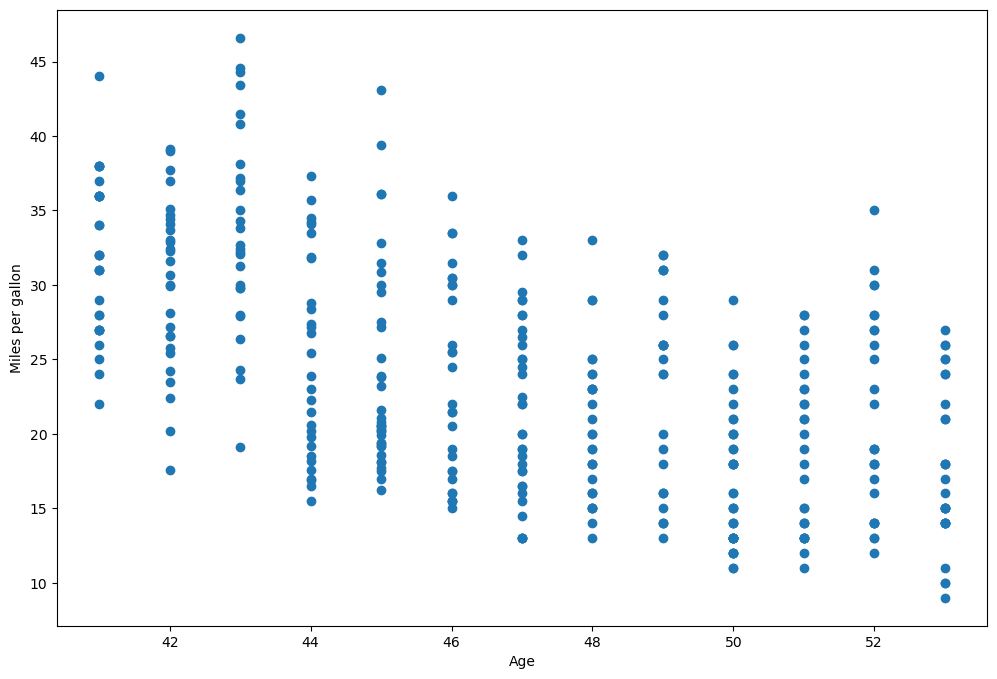

In [21]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(automobile_df['age'], automobile_df['mpg'])
plt.xlabel('Age')
plt.ylabel('Miles per gallon')
plt.show()

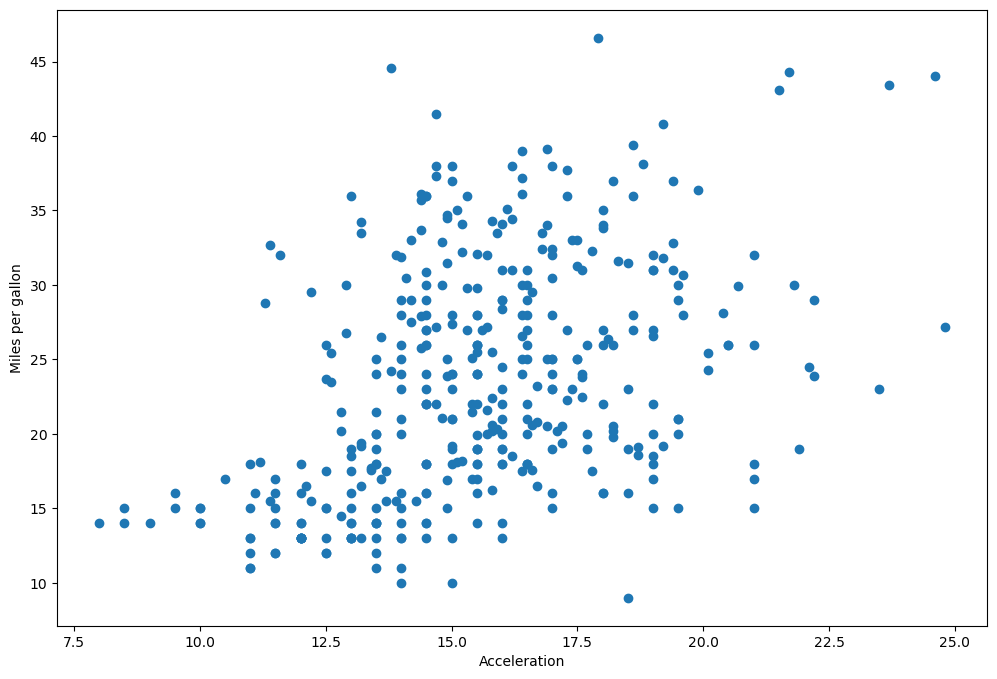

In [22]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(automobile_df['acceleration'], automobile_df['mpg'])
plt.xlabel('Acceleration')
plt.ylabel('Miles per gallon')
plt.show()

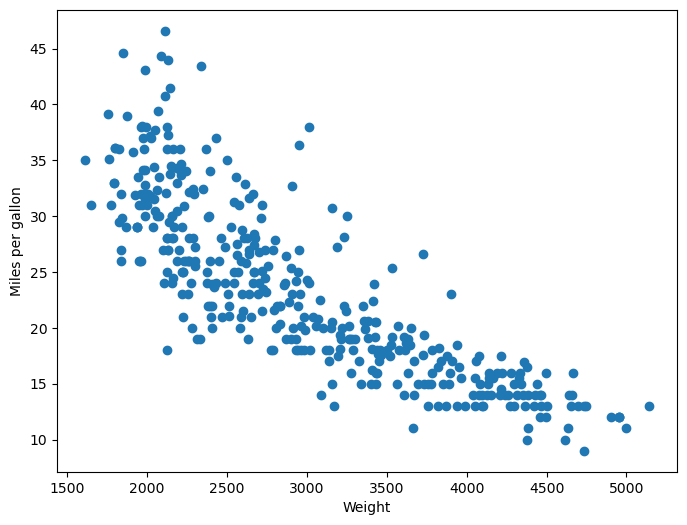

In [24]:
fig, ax = plt.subplots(figsize=(8,6))

plt.scatter(automobile_df['weight'], automobile_df['mpg'])
plt.xlabel('Weight')
plt.ylabel('Miles per gallon')
plt.show()

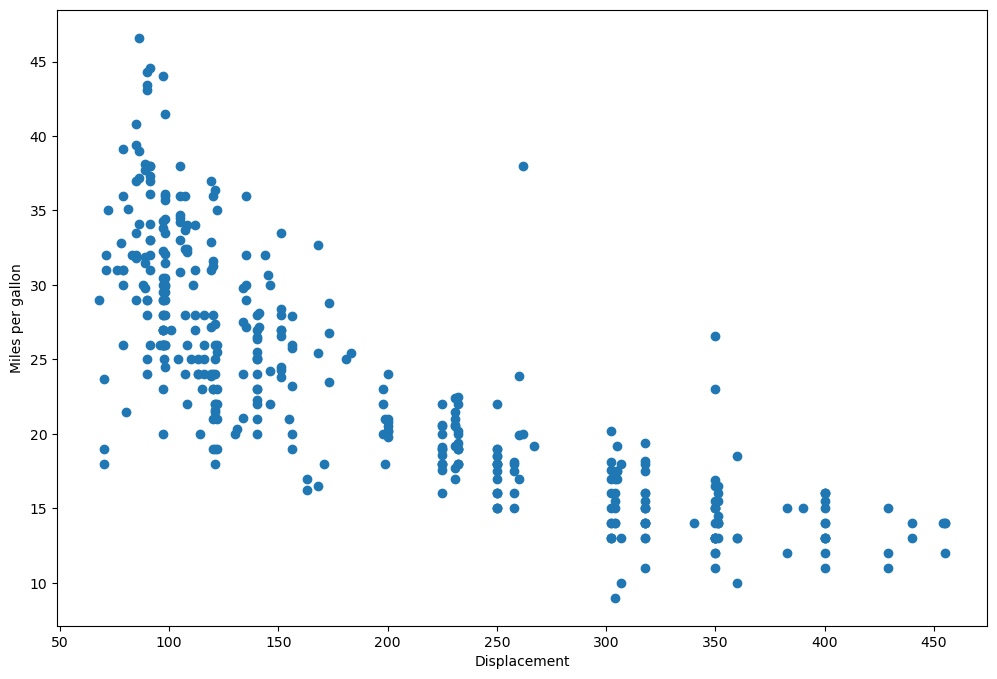

In [25]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(automobile_df['displacement'], automobile_df['mpg'])
plt.xlabel('Displacement')
plt.ylabel('Miles per gallon')
plt.show()

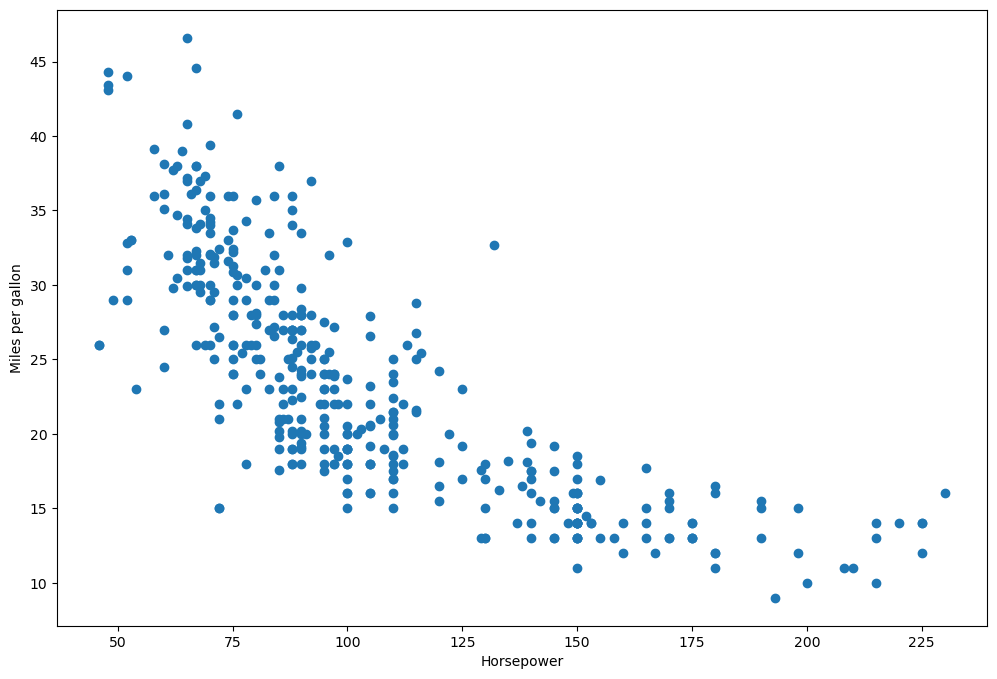

In [26]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(automobile_df['horsepower'], automobile_df['mpg'])
plt.xlabel('Horsepower')
plt.ylabel('Miles per gallon')
plt.show()

In [27]:
automobile_df_corr = automobile_df.corr()
automobile_df_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


<AxesSubplot:>

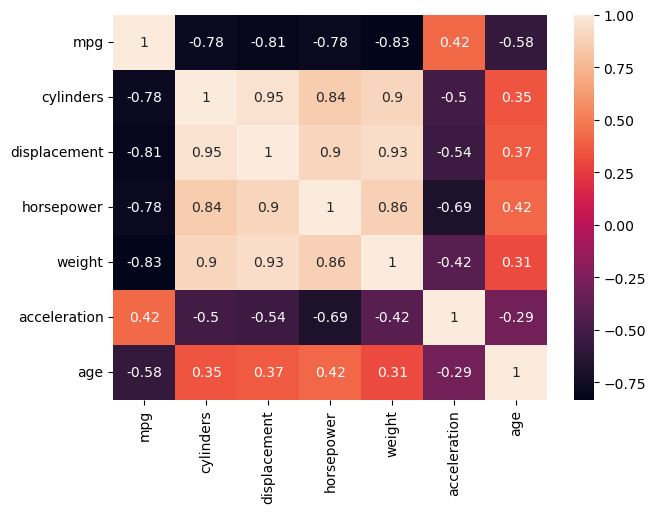

In [28]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(automobile_df_corr, annot=True)

* Shuffle the data

In [29]:
automobile_df = automobile_df.sample(frac=1).reset_index(drop=True)
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,19.1,6,225.0,90,3381,18.7,43
1,21.0,4,140.0,72,2401,19.5,50
2,13.0,8,350.0,165,4274,12.0,51
3,27.0,4,140.0,86,2790,15.6,41
4,14.0,8,455.0,225,3086,10.0,53


In [30]:
automobile_df.to_csv('datasets/regression/auto-mpg-processed.csv', index=False)

In [31]:
!ls datasets


Mnist  housing	regression  titanic
